Plots cumulative read fraction vs number of peptides (ranked)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

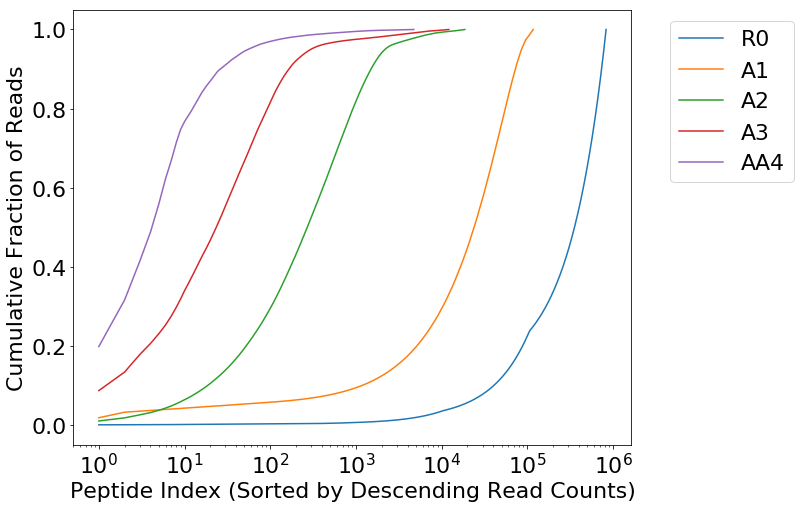

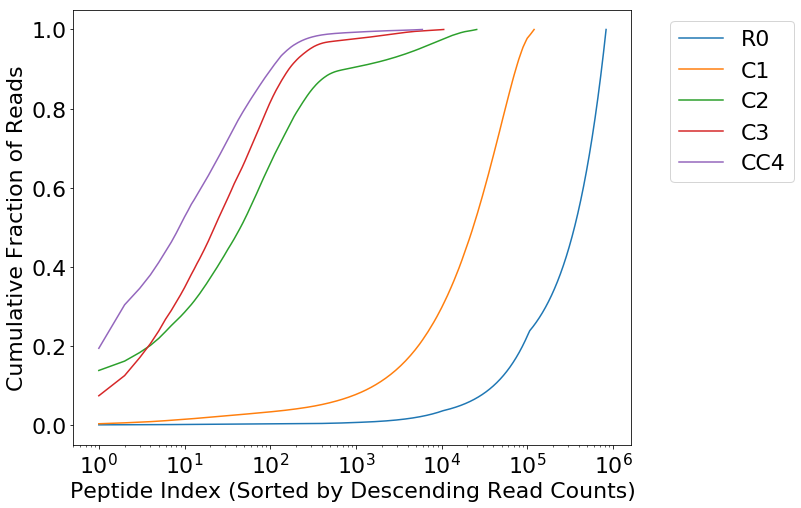

In [2]:
# NKG2x all rounds

for X in ['A','C']:
    plt.figure(figsize=(10,8))
    plt.rcParams.update({'font.size': 22})
    for i in ['R0',X+'1',X+'2',X+'3',X+X+'4']:
        data = pd.read_csv('3312{}_cdhit-corrected_data.csv'.format(i))
        data = data[~data['sequence'].str.contains('*',regex=False)].sort_values(by='count',ascending=False) #remove stop codons, sort

        data['cumsum']=data['count'].cumsum()
        data['cumsum']=data['cumsum']/data['cumsum'].iloc[-1]

        plt.plot(range(1,len(data['cumsum'])+1), data['cumsum'],label=i)

    plt.xscale('log')
    plt.xlabel('Peptide Index (Sorted by Descending Read Counts)')
    plt.ylabel('Cumulative Fraction of Reads')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()